In [21]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather Data
Following files are gathered
1)Twitter Archive File: 'WeRateDogs' twitter archive file provided by Udacity
2)Image Predictions File: Downloaded using URL provided
3)Tweet JSON Data: Query the Twitter API to get JSON data for each tweets in WeRateDogs written to its own line in a txt file.

In [22]:
#Read in the Twitter archive file

tw_arch = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
# Download image predictions TSV from URL and write it to image_predictions.tsv

url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as f:
    f.write(r.content)
img_pre = pd.read_csv('image_predictions.tsv', sep='\t' )
img_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
##twitter API keys
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [25]:
# Get a list of tweet_ids from the twitter archive file to use for downloading with the Twitter API
tweet_ids = tw_arch.tweet_id.values
print("Count of tweet id: " + str(len(tweet_ids)) + "\n")

count = 0
err = {}

# Add each matched tweet's json data to tweet's json list and data to a txt file
with open('tweet_json.txt', 'w') as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            ##print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
        # print error for review   
            print("TweepError for id:  " + str(tweet_id))
            err[tweet_id] = e
            pass


print("Number of TweepErrors:  {}\n".format(len(err)))

Count of tweet id: 2356

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
TweepError for id:  888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42

325: 834086379323871233
326: 833863086058651648
327: 833826103416520705
328: 833732339549220864
329: 833722901757046785
330: 833479644947025920
331: 833124694597443584
332: 832998151111966721
333: 832769181346996225
334: 832757312314028032
335: 832682457690300417
336: 832645525019123713
337: 832636094638288896
338: 832397543355072512
339: 832369877331693569
340: 832273440279240704
341: 832215909146226688
342: 832215726631055365
343: 832088576586297345
344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
TweepError for id:  829374341691346946
3

661: 791312159183634433
662: 791026214425268224
663: 790987426131050500
664: 790946055508652032
665: 790723298204217344
666: 790698755171364864
667: 790581949425475584
668: 790337589677002753
669: 790277117346975746
670: 790227638568808452
671: 789986466051088384
672: 789960241177853952
673: 789903600034189313
674: 789628658055020548
675: 789599242079838210
676: 789530877013393408
677: 789314372632018944
678: 789280767834746880
679: 789268448748703744
680: 789137962068021249
681: 788908386943430656
682: 788765914992902144
683: 788552643979468800
684: 788412144018661376
685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 78605133729

993: 748692773788876800
994: 748575535303884801
995: 748568946752774144
996: 748346686624440324
997: 748337862848962560
998: 748324050481647620
999: 748307329658011649
1000: 748220828303695873
1001: 747963614829678593
1002: 747933425676525569
1003: 747885874273214464
1004: 747844099428986880
1005: 747816857231626240
1006: 747651430853525504
1007: 747648653817413632
1008: 747600769478692864
1009: 747594051852075008
1010: 747512671126323200
1011: 747461612269887489
1012: 747439450712596480
1013: 747242308580548608
1014: 747219827526344708
1015: 747204161125646336
1016: 747103485104099331
1017: 746906459439529985
1018: 746872823977771008
1019: 746818907684614144
1020: 746790600704425984
1021: 746757706116112384
1022: 746726898085036033
1023: 746542875601690625
1024: 746521445350707200
1025: 746507379341139972
1026: 746369468511756288
1027: 746131877086527488
1028: 746056683365994496
1029: 745789745784041472
1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 7

1321: 706346369204748288
1322: 706310011488698368
1323: 706291001778950144
1324: 706265994973601792
1325: 706169069255446529
1326: 706166467411222528
1327: 706153300320784384
1328: 705975130514706432
1329: 705970349788291072
1330: 705898680587526145
1331: 705786532653883392
1332: 705591895322394625
1333: 705475953783398401
1334: 705442520700944385
1335: 705428427625635840
1336: 705239209544720384
1337: 705223444686888960
1338: 705102439679201280
1339: 705066031337840642
1340: 704871453724954624
1341: 704859558691414016
1342: 704847917308362754
1343: 704819833553219584
1344: 704761120771465216
1345: 704499785726889984
1346: 704491224099647488
1347: 704480331685040129
1348: 704364645503647744
1349: 704347321748819968
1350: 704134088924532736
1351: 704113298707505153
1352: 704054845121142784
1353: 703774238772166656
1354: 703769065844768768
1355: 703631701117943808
1356: 703611486317502464
1357: 703425003149250560
1358: 703407252292673536
1359: 703382836347330562
1360: 703356393781329922


1650: 683742671509258241
1651: 683515932363329536
1652: 683498322573824003
1653: 683481228088049664
1654: 683462770029932544
1655: 683449695444799489
1656: 683391852557561860
1657: 683357973142474752
1658: 683142553609318400
1659: 683111407806746624
1660: 683098815881154561
1661: 683078886620553216
1662: 683030066213818368
1663: 682962037429899265
1664: 682808988178739200
1665: 682788441537560576
1666: 682750546109968385
1667: 682697186228989953
1668: 682662431982772225
1669: 682638830361513985
1670: 682429480204398592
1671: 682406705142087680
1672: 682393905736888321
1673: 682389078323662849
1674: 682303737705140231
1675: 682259524040966145
1676: 682242692827447297
1677: 682088079302213632
1678: 682059653698686977
1679: 682047327939461121
1680: 682032003584274432
1681: 682003177596559360
1682: 681981167097122816
1683: 681891461017812993
1684: 681694085539872773
1685: 681679526984871937
1686: 681654059175129088
1687: 681610798867845120
1688: 681579835668455424
1689: 681523177663676416


1977: 672995267319328768
1978: 672988786805112832
1979: 672984142909456390
1980: 672980819271634944
1981: 672975131468300288
1982: 672970152493887488
1983: 672968025906282496
1984: 672964561327235073
1985: 672902681409806336
1986: 672898206762672129
1987: 672884426393653248
1988: 672877615439593473
1989: 672834301050937345
1990: 672828477930868736
1991: 672640509974827008
1992: 672622327801233409
1993: 672614745925664768
1994: 672609152938721280
1995: 672604026190569472
1996: 672594978741354496
1997: 672591762242805761
1998: 672591271085670400
1999: 672538107540070400
2000: 672523490734551040
2001: 672488522314567680
2002: 672482722825261057
2003: 672481316919734272
2004: 672475084225949696
2005: 672466075045466113
2006: 672272411274932228
2007: 672267570918129665
2008: 672264251789176834
2009: 672256522047614977
2010: 672254177670729728
2011: 672248013293752320
2012: 672245253877968896
2013: 672239279297454080
2014: 672231046314901505
2015: 672222792075620352
2016: 672205392827572224


2306: 666837028449972224
2307: 666835007768551424
2308: 666826780179869698
2309: 666817836334096384
2310: 666804364988780544
2311: 666786068205871104
2312: 666781792255496192
2313: 666776908487630848
2314: 666739327293083650
2315: 666701168228331520
2316: 666691418707132416
2317: 666649482315059201
2318: 666644823164719104
2319: 666454714377183233
2320: 666447344410484738
2321: 666437273139982337
2322: 666435652385423360
2323: 666430724426358785
2324: 666428276349472768
2325: 666421158376562688
2326: 666418789513326592
2327: 666411507551481857
2328: 666407126856765440
2329: 666396247373291520
2330: 666373753744588802
2331: 666362758909284353
2332: 666353288456101888
2333: 666345417576210432
2334: 666337882303524864
2335: 666293911632134144
2336: 666287406224695296
2337: 666273097616637952
2338: 666268910803644416
2339: 666104133288665088
2340: 666102155909144576
2341: 666099513787052032
2342: 666094000022159362
2343: 666082916733198337
2344: 666073100786774016
2345: 666071193221509120


In [26]:
#read in the JSON data from the text file
with open('tweet_json.txt', 'r') as f:
    tw_json = pd.read_json(f, lines= True, encoding = 'utf-8')

tw_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34782,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7288,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30142,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5447,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22678,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3589,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38058,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36347,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8034,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",18326,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2698,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10672,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1738,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",58601,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,16356,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",25237,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3740,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",28776,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6311,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Assess Data

Here we check the details of data to assess the cleaning required for further analysis.

In [27]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
img_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [32]:
tw_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2331.000000,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2197.0,2197.0,2.600000e+01,2.600000e+01,2331.000000
mean,NaN,NaN,7264.428571,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2564.993994
std,NaN,NaN,11285.091393,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4338.865266
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1257.000000,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,519.500000
50%,NaN,NaN,3147.000000,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1195.000000
75%,NaN,NaN,8879.000000,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,2971.000000
max,NaN,NaN,149424.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,73548.000000


In [33]:
tw_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [34]:
tw_json.drop(['contributors', 'coordinates','display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo','id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweeted',
       'retweeted_status', 'source', 'truncated' ],  axis=1, inplace=True)

In [35]:
tw_json.head(5)

,created_at,favorite_count,id,retweet_count,user
0,2017-08-01 16:23:56,34782,892420643555336193,7288,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,30142,892177421306343426,5447,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,22678,891815181378084864,3589,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,38058,891689557279858688,7480,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,36347,891327558926688256,8034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality Issues:
1. There are 181 retweets which indicates duplicate tweet IDs
2. There are 78 replies which indicates duplicate tweet IDs
3. tweet_id is saved as int datatype instead of string (object)
4. Datatype for timestamp should be datetime format
5. There are 2297 Explanded URLs indicating 59 Nulls
6. While Query the Twitter API to get JSON data for each tweets,25 tweet errors were noted which are removed.
7. We need to remove extra columns which are not required for further analysis
8. There are 2075 tweet in image prediction file, hence indicating that not all tweets have images
9. The rating_numerator and rating_denominator contains ratings that should be in decimals, hence data type should be float. 
10. The rating_denominator contains values other than 10
11. Dog name columns include characters like a, the etc which are not names
 

### Tidiness Issues:
1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo) which should be merged to one 
2. Column names in image predictive are not decriptive
3. Column Name "id" in json data needs to be renames as tweet_id to match with other files
4. When we merge all 3 data gathered there some tweet IDs donot match and hence would be removed

# Clean Data

### Quality Issue 5

In [168]:
# create copies of the dataframes for cleaning
arch = tw_arch.copy()
pre = img_pre.copy()
json = tw_json.copy()

In [169]:
#merge arch file and pre file
collate = pd.merge(left=arch, right=pre, left_on='tweet_id', right_on='tweet_id', how='inner')

### Tidiness isuue 3 

In [170]:
#rename column head
json=json.rename(columns = {'id':'tweet_id'}, inplace = False)

In [171]:
#merge collated arch file and pre file to json file
collate = collate.merge(json, on='tweet_id', how='inner')

In [172]:
#Length of dataset
collate.shape

(2059, 32)

In [173]:
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

### Quality Issue 1

In [174]:
#remove null columns from retweet
collate = collate[collate.retweeted_status_id.isna()]

In [175]:
#check if the rows are removed
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
jpg_url                       1987 non

### Quality Issue 2

In [176]:
#remove null columns from reply
collate = collate[collate.in_reply_to_status_id.isna()]


In [177]:
#check if the rows are removed
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1964 non-n

### Quality Issue 3

In [178]:
#convert tweet id to string
collate['tweet_id'] = collate.tweet_id.astype(str)

In [179]:
#check if the data is converted
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      1964 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1964 non-

### Quality Issue 4

In [180]:
#convert timestamp to datetime
collate['timestamp'] = pd.to_datetime(collate.timestamp)

In [181]:
#check if data is converted
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      1964 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null datetime64[ns]
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1

### Quality Issue 6
This is already resolved while gathering data to write the json txt file.

### Tidiness Issue 1

In [182]:
#Merge dog stage columns to 1 column
collate.doggo.replace('None','',inplace = True)
collate.floofer.replace('None','',inplace = True)
collate.pupper.replace('None','',inplace = True)
collate.puppo.replace('None','',inplace = True)

collate['dogstage'] = collate.doggo+collate.floofer+collate.pupper+collate.puppo

In [183]:
collate.dogstage.value_counts()

                1662
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dogstage, dtype: int64

In [184]:
#To seperate doggopupper,doggopuppo, doggofloofer
collate.loc[collate.dogstage == 'doggopupper', 'dogstage'] = 'doggo,pupper'
collate.loc[collate.dogstage == 'doggopuppo', 'dogstage'] = 'doggo,puppo'
collate.loc[collate.dogstage == 'doggofloofer', 'dogstage'] = 'doggo,floofer'


In [185]:

collate.loc[collate.dogstage == '', 'dogstage'] = np.nan
collate.dogstage.value_counts()

pupper           201
doggo             62
puppo             22
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dogstage, dtype: int64

In [186]:
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 33 columns):
tweet_id                      1964 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null datetime64[ns]
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1

### Quality Issue 8

In [187]:
#remove tweets without image
dog_type = []
conf_list = []

# Create a function to capture the dog type and confidence level
def image(collate):
    if collate['p1_dog'] == True:
        dog_type.append(collate['p1'])
        conf_list.append(collate['p1_conf'])
    elif collate['p2_dog'] == True:
        dog_type.append(collate['p2'])
        conf_list.append(collate['p2_conf'])
    elif collate['p3_dog'] == True:
        dog_type.append(collate['p3'])
        conf_list.append(collate['p3_conf'])
    else:
        dog_type.append('Error')
        conf_list.append('Error')

        
collate.apply(image, axis=1)

# Create new columns
collate['dog_type'] = dog_type
collate['conf_list'] = conf_list

# Drop rows that have error
collate = collate[collate['dog_type'] != 'Error']

In [188]:
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2058
Data columns (total 35 columns):
tweet_id                      1659 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1659 non-null datetime64[ns]
source                        1659 non-null object
text                          1659 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1659 non-null object
rating_numerator              1659 non-null int64
rating_denominator            1659 non-null int64
name                          1659 non-null object
doggo                         1659 non-null object
floofer                       1659 non-null object
pupper                        1659 non-null object
puppo                         1659 non-null object
jpg_url                       1

## Quality Issue 7

In [189]:
collate.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'favorite_count',
       'retweet_count', 'user', 'dogstage', 'dog_type', 'conf_list'],
      dtype='object')

In [190]:
collate.drop(['doggo', 'floofer', 'pupper', 'puppo',
        'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at','user' ], axis=1, inplace = True)


### Quality Issue 9 and 10

In [192]:
collate[['rating_numerator', 'rating_denominator']] = collate[['rating_numerator','rating_denominator']].astype(float)
collate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2058
Data columns (total 19 columns):
tweet_id                      1659 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1659 non-null datetime64[ns]
source                        1659 non-null object
text                          1659 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1659 non-null object
rating_numerator              1659 non-null float64
rating_denominator            1659 non-null float64
name                          1659 non-null object
jpg_url                       1659 non-null object
favorite_count                1659 non-null int64
retweet_count                 1659 non-null int64
dogstage                      256 non-null object
dog_type                      

In [193]:
#all denominator rating to get list of ratings other than 10
collate.rating_denominator.value_counts().sort_index(ascending = False)

150.0       1
120.0       1
110.0       1
90.0        1
80.0        2
70.0        1
50.0        3
40.0        1
20.0        1
11.0        2
10.0     1643
7.0         1
2.0         1
Name: rating_denominator, dtype: int64

In [194]:
#list of IDs where denominator is not 10
with pd.option_context('max_colwidth', 200):
    display(collate[collate['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
336,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
406,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
722,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
863,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
954,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
988,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1009,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1034,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1052,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1118,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0


In [195]:
#list of ratings in text but numerator rating different
with pd.option_context('max_colwidth', 200):
    display(collate[collate['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
548,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
603,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1438,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [196]:
#from above we understand 16 IDs donot have denominator as 10 and 4 IDs have incorrect ratings when compared to the text

### Quality Issue 11

In [197]:
#list of dog names
collate.name.value_counts().sort_index(ascending = False)

very             3
unacceptable     1
the              7
space            1
quite            2
one              3
officially       1
not              1
my               1
light            1
just             3
infuriating      1
incredibly       1
getting          2
an               4
all              1
actually         1
a               46
Zooey            1
Zoey             3
Zoe              1
Ziva             1
Zeus             1
Zeke             3
Zeek             1
Zara             1
Yogi             2
Yoda             1
Wyatt            3
Wishes           1
                ..
Archie           3
Aqua             1
Apollo           1
Antony           1
Anna             1
Angel            1
Andy             1
Andru            1
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            4
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            1
Albert      

In [198]:
#count of none as names
collate.name[collate.name == 'None'].value_counts()

None    400
Name: name, dtype: int64

In [199]:
#list names with lower case and None
count_lower = list(collate[collate.name.str.islower()].name.value_counts().index)
count_lower.append('None')
count_lower

['a',
 'the',
 'an',
 'one',
 'just',
 'very',
 'getting',
 'quite',
 'light',
 'officially',
 'infuriating',
 'not',
 'actually',
 'unacceptable',
 'incredibly',
 'space',
 'all',
 'my',
 'None']

In [200]:
#replacing above with None
collate['name'][collate['name'].str.match('[a-z]+')] = 'None'
collate.name[collate.name == 'None'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


None    480
Name: name, dtype: int64

# Storing, Analyzing, and Visualizing Data for this Project

In [201]:
#Store in a CSV file
collate.to_csv('twitter_archive_master.csv', index=False)

In [202]:
#Basic overview
collate

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dogstage,dog_type,conf_list
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30142,5447,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,22678,3589,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,38058,7480,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,36347,8034,NaN,basset,0.555712
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,18326,2698,NaN,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10672,1738,NaN,Appenzeller,0.341703
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,58601,16356,NaN,Pomeranian,0.566142
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,25237,3740,NaN,Irish_terrier,0.487574
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,28776,6311,doggo,Pembroke,0.511319
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,27778,6351,NaN,Samoyed,0.957979


### Which tweet is most favourite?

Answer: Sort dataset by most favorites

In [203]:
collate.sort_values(by = 'favorite_count', ascending = False)[['tweet_id','favorite_count']]

,tweet_id,favorite_count
838,744234799360020481,149424
320,822872901745569793,127871
423,807106840509214720,115445
110,866450705531457537,112064
873,739238157791694849,110580
59,879415818425184262,95606
349,819004803107983360,85118
138,859196978902773760,83119
94,870374049280663552,76083
1487,678399652199309312,75902


### Which tweet has highest retweets?

Answer: Sort dataset by highest retweets

In [204]:
collate.sort_values(by = 'retweet_count', ascending = False)[['tweet_id','retweet_count']]

,tweet_id,retweet_count
838,744234799360020481,73548
873,739238157791694849,54837
423,807106840509214720,53692
320,822872901745569793,41486
59,879415818425184262,38745
349,819004803107983360,35780
426,806629075125202948,33577
110,866450705531457537,31360
1487,678399652199309312,29744
1545,676219687039057920,28772


### What is the correlation between favorite and retweet count tweets?

Answer: Based on analysis below the correlation is high being 0.93. The more the favorites, the more they are retweeted.

In [205]:
# correlation of favourite and retweet tweet id

corr_mat = collate[['favorite_count','retweet_count']]

corrMatrix = corr_mat.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation between Favorite and Retweet Count Tweets')
plt.show()

NameError: name 'sn' is not defined

## What is the count of likes and retweets by Dog stage?

Answer: Here we get data of number of favorites and retweets by Dog Stages and understand that Doggo, Puppo Stage has highest likes (16636) and highest retweets(43067).

In [206]:
#print favorite count and retweet count based on dogstage

print('Doggo Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'doggo'].mean())))
print('Doggo Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'doggo'].mean())))
print('Floofer Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'floofer'].mean())))
print('Floofer Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'floofer'].mean())))
print('Pupper Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'pupper'].mean())))
print('Pupper Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'pupper'].mean())))
print('Puppo Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'puppo'].mean())))
print('Puppo Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'puppo'].mean())))
print('Doggo,Pupper Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'doggo,pupper'].mean())))
print('Doggo,Pupper Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'doggo,pupper'].mean())))
print('Doggo,Floofer Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'doggo,floofer'].mean())))
print('Doggo,Floofer Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'doggo,floofer'].mean())))
print('Doggo,Puppo Average Favorite Count : {}'.format(round(collate.retweet_count[collate.dogstage == 'doggo,puppo'].mean())))
print('Doggo,Puppo Average Retweet Count : {}'.format(round(collate.favorite_count[collate.dogstage == 'doggo,puppo'].mean())))


Doggo Average Favorite Count : 6183.0
Doggo Average Retweet Count : 18378.0
Floofer Average Favorite Count : 4127.0
Floofer Average Retweet Count : 11566.0
Pupper Average Favorite Count : 2052.0
Pupper Average Retweet Count : 6759.0
Puppo Average Favorite Count : 5451.0
Puppo Average Retweet Count : 20108.0
Doggo,Pupper Average Favorite Count : 4101.0
Doggo,Pupper Average Retweet Count : 13873.0
Doggo,Floofer Average Favorite Count : 2905.0
Doggo,Floofer Average Retweet Count : 15291.0
Doggo,Puppo Average Favorite Count : 16634.0
Doggo,Puppo Average Retweet Count : 43063.0


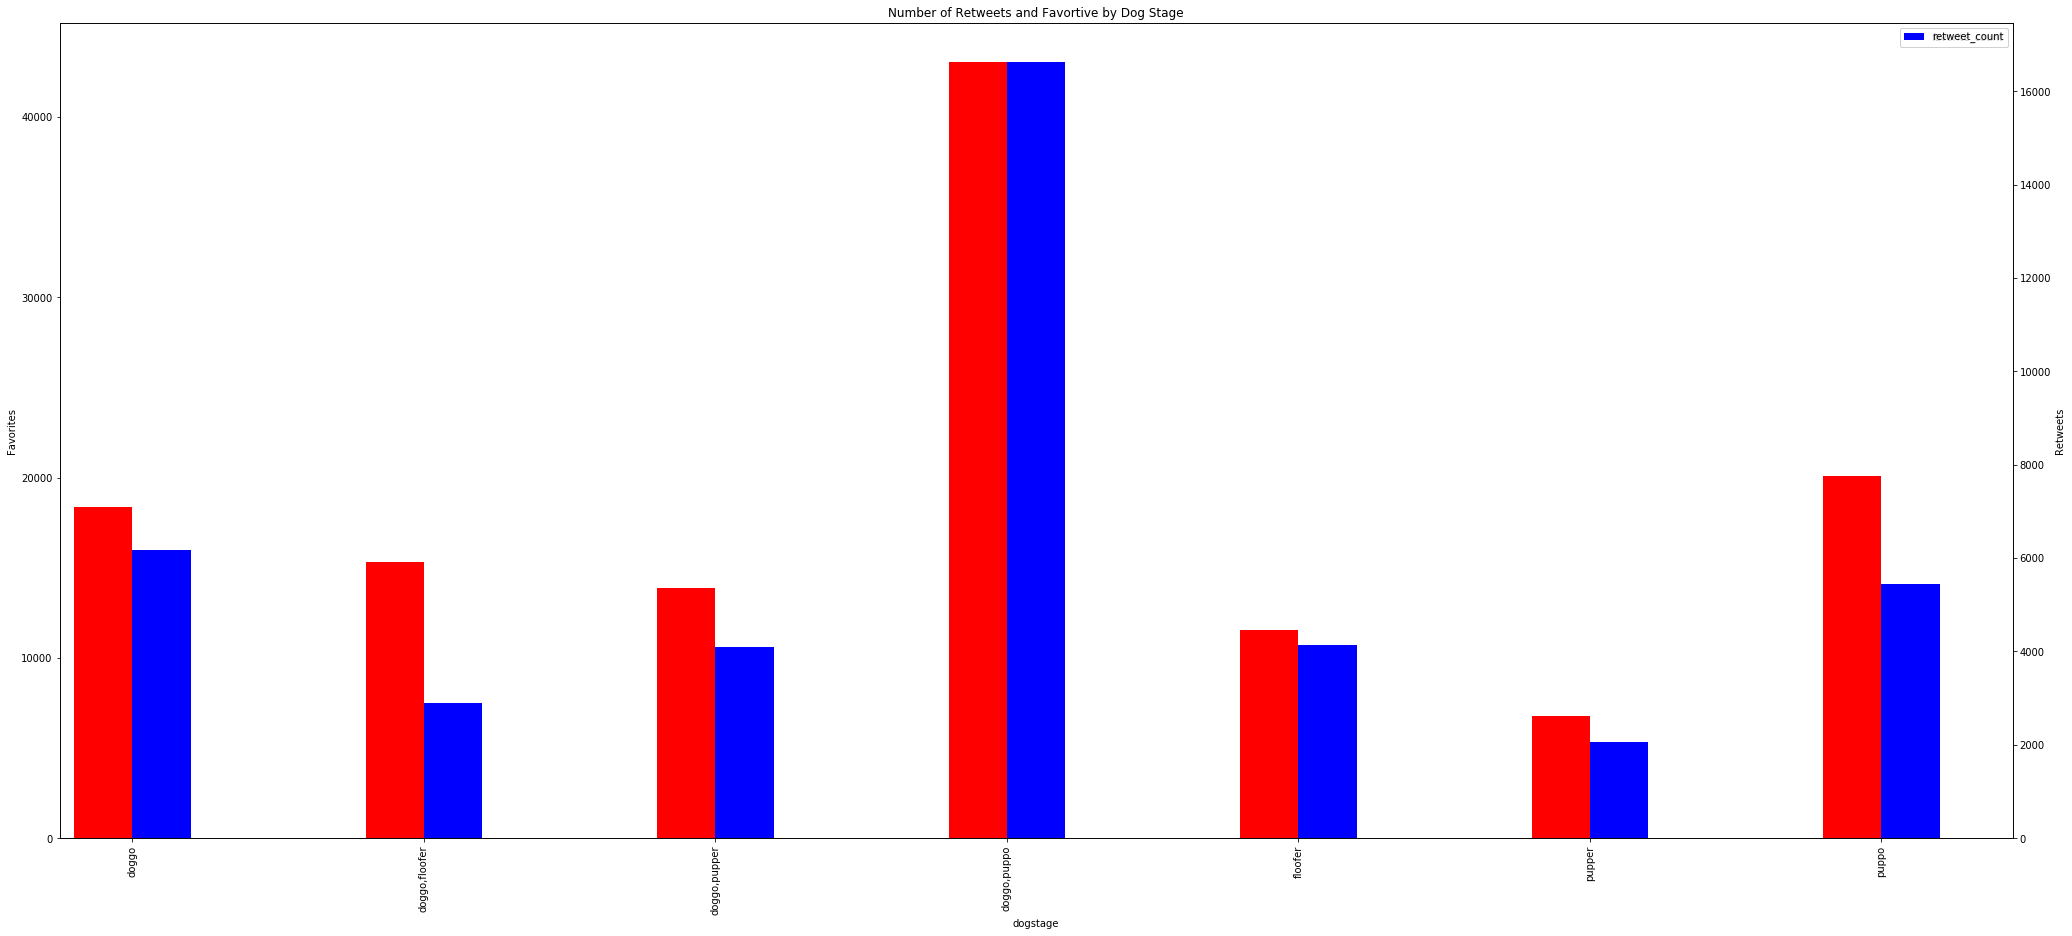

In [207]:
dog_stage_likes = collate[['dogstage', 'favorite_count','retweet_count']]
dog_stage_likes = dog_stage_likes.query('dogstage != ""')
dog_stage_likes = dog_stage_likes.groupby('dogstage').mean()

fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
dog_stage_likes.favorite_count.plot(kind='bar', color='red', ax=ax, position=1, width=0.2,figsize=(35,15), align='center',legend=True)
dog_stage_likes.retweet_count.plot(kind='bar', color='blue', ax=ax2, position=0, width=0.2,figsize=(35,15), align='center',legend=True)
ax.set_ylabel('Favorites')
ax2.set_ylabel('Retweets')
plt.title('Number of Retweets and Favortive by Dog Stage')
plt.show()

### Which are the Top5 dog type with highest retweets?

Answer: Based on analysis below, top5 dog breed with highest retweets are golden_retriever(494474), Labrador_retriever(329021), Pembroke(245445), Chihuahua(218268) and Samoyed(161654).

In [208]:
#get top5 dog breed based on highest retweet
re_dogtype = collate[collate.dog_type != 'none']
re_dogtype = re_dogtype.groupby(['dog_type'])
re_dogtype = re_dogtype['retweet_count'].sum()
re_dogtype = re_dogtype.sort_values(ascending = False)
top5_re_dogtype= re_dogtype.head(5)
top5_re_dogtype

dog_type
golden_retriever      494416
Labrador_retriever    328988
Pembroke              245415
Chihuahua             218248
Samoyed               161630
Name: retweet_count, dtype: int64

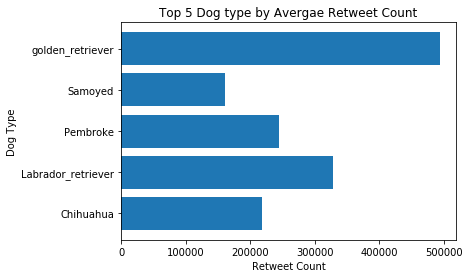

In [209]:
plt.barh(top5_re_dogtype.index, top5_re_dogtype)

plt.xlabel('Retweet Count')
plt.ylabel('Dog Type')
plt.title('Top 5 Dog type by Avergae Retweet Count')
plt.show();